Data preprocessing:

1. Check descriptive statistics of each column
2. Check for missing values
3. Remove outliers
4. Feature Selection
5. Split into training and testing dataset (80:20)
6. Data oversampling 
7. Feature Scaling - Done by individual model if needed.(only for distance-based model, such as KNN/PCA, not needed for tree-based/probability-based model such as Decision Tree/Naive Bayes)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler

In [ ]:
## Settings for pandas display
#show all columns
pd.set_option('display.max_columns', None)
#show all rows
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [ ]:
## load data
# For running in jupyter notebook
raw_data = pd.read_csv("dataset/creditcard.csv")

# # For running in colab
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# data_path = '/content/gdrive/My Drive/CZ4032/dataset/creditcard.csv'
# raw_data = pd.read_csv(data_path)

In [ ]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
## 1. Check descriptive statistics of each column
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [ ]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Number of Valid cases : 284315
Number of Fraud cases     : 492


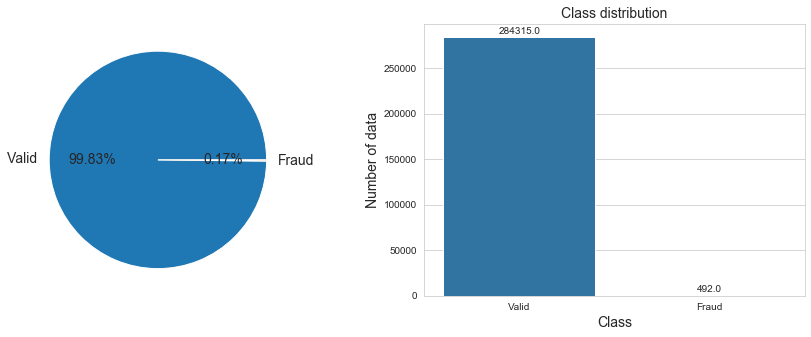

In [ ]:
# check class distribution - imbalanced
valid, fraud = raw_data['Class'].value_counts()
print('Number of Valid cases :', valid)
print('Number of Fraud cases     :', fraud)
values = [valid, fraud]
labels = ['Valid', 'Fraud']
fig, axes = plt.subplots(1,2, figsize = (15,5))
axes[0].pie(values, labels = labels, autopct = '%.2f%%',textprops={'fontsize': 14})
barp = sns.barplot(x = labels , y = values, ax = axes[1])
plt.xlabel('Class',fontsize=14)
plt.ylabel('Number of data',fontsize=14)
plt.title('Class distribution',fontsize=14)
for x in barp.patches:
    barp.annotate(format(x.get_height()),(x.get_x() + x.get_width()/2 , x.get_height()) , ha = 'center', va = 'center', xytext = (0,6), textcoords = 'offset points')

plt.show()

In [ ]:
## 2.check for missing value
data = raw_data.copy()
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

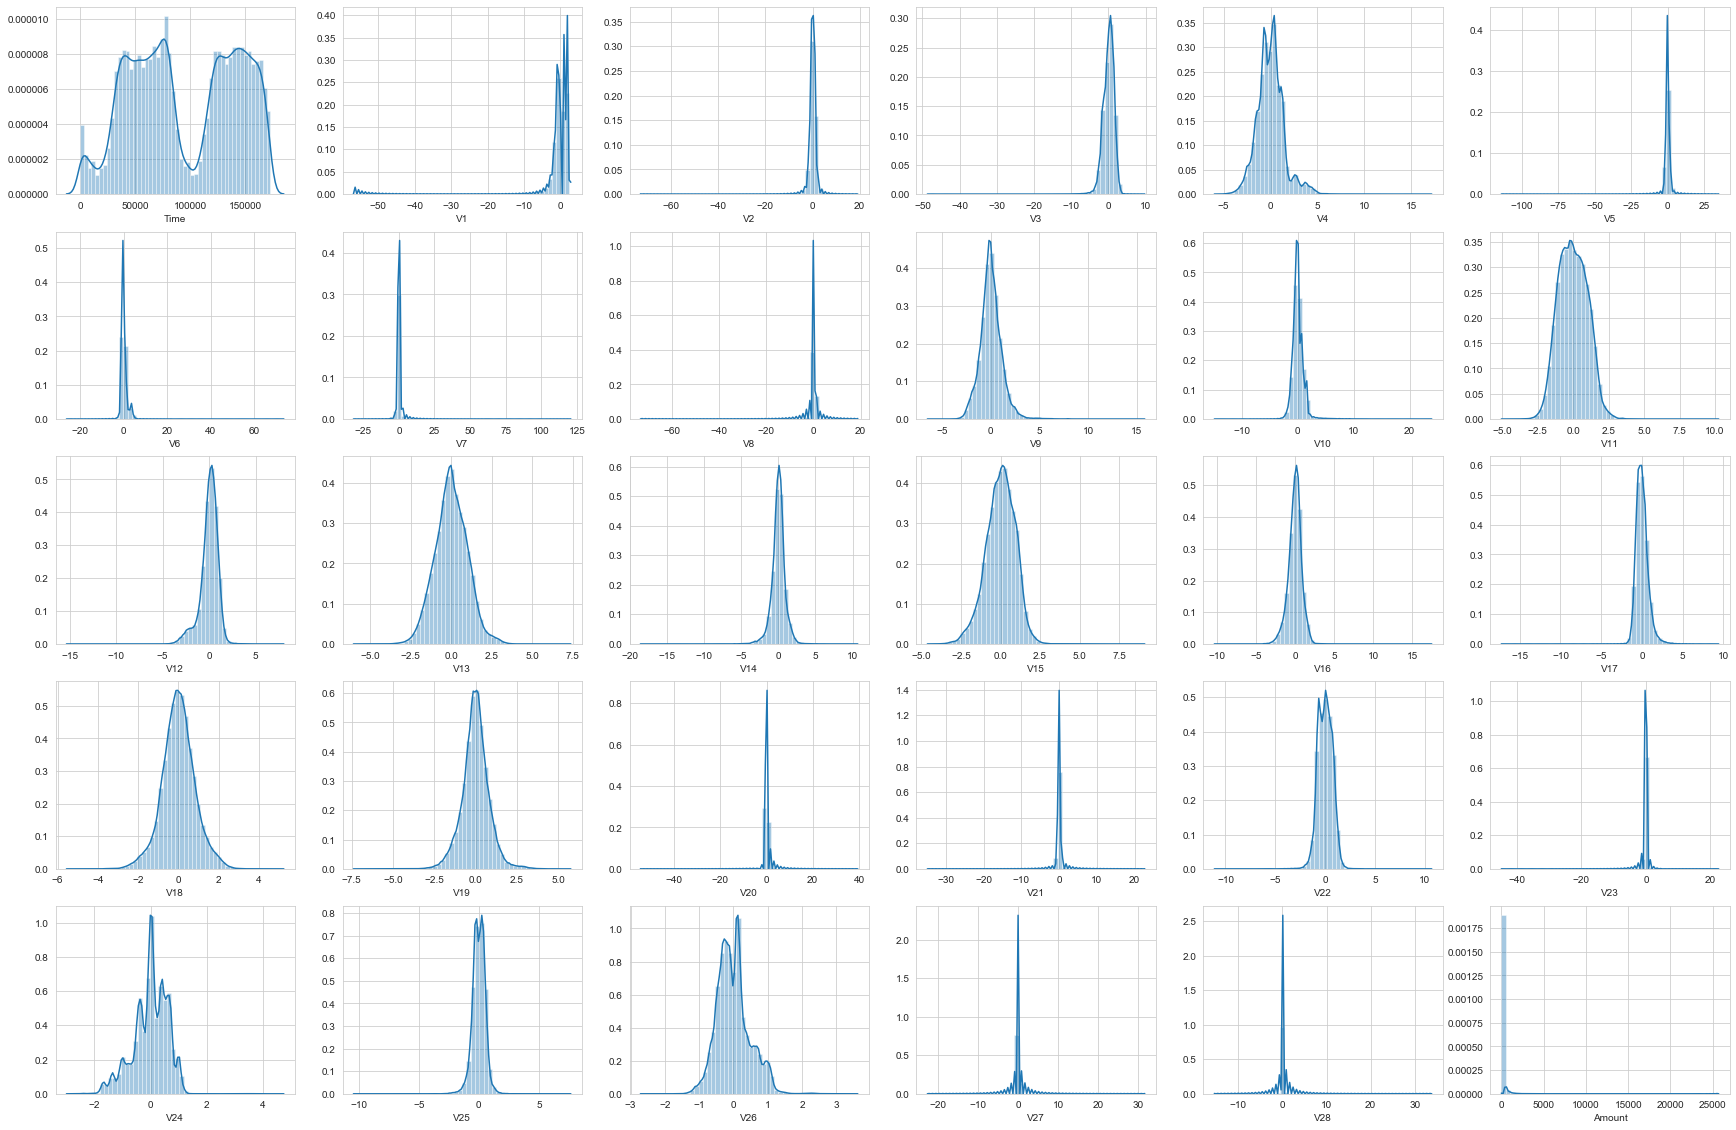

In [ ]:
## 3.Dealing with outliers 
# As the dataset is imbalanced, we only deal with outliers in Class 0 here
#Plot distribution of each attribute of Class 0 data
valid_df = data[data.Class == 0]
plt.figure(figsize=(30,20))
for col in range(30):
    plt.subplot(5,6,col+1) 
    sns.distplot(valid_df.iloc[:,col])


In [ ]:
#Remove outliers (normal distribution within 3 standard deviation)
data_without_outliers = data.copy()
for i in [1,5]:
    attr_name = 'V'+str(i)
    q1 = valid_df[attr_name].quantile(0.99865)
    q2 = valid_df[attr_name].quantile(0.00135)
    data_without_outliers = data_without_outliers[(data_without_outliers.Class==1) | ((data_without_outliers.Class==0) & (data_without_outliers[attr_name] < q1) & (data_without_outliers[attr_name] > q2) )]

q1 = valid_df['Amount'].quantile(0.99865)
q2 = valid_df['Amount'].quantile(0.00135)
data_without_outliers = data_without_outliers[(data_without_outliers.Class==1) | ((data_without_outliers.Class==0) & (data_without_outliers['Amount'] < q1) & (data_without_outliers['Amount'] > q2) )]

In [ ]:
data_without_outliers.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000,281461.000000
mean,94793.017057,0.040788,0.041350,0.015941,-0.020979,0.003559,-0.000182,-0.001964,0.002084,0.001164,-0.004618,0.003253,0.000541,-0.002488,-0.001848,0.001295,-0.004223,0.000535,0.001468,0.002133,0.001813,0.000817,0.000663,0.003216,-0.000274,-0.000343,-0.001093,-0.001061,0.000210,82.418521,0.001748
std,47484.374743,1.767920,1.380934,1.456680,1.383245,1.198378,1.265425,1.071764,1.157534,1.092576,1.074768,1.015443,0.993298,0.993026,0.950360,0.911261,0.867976,0.839403,0.835942,0.808169,0.598270,0.708253,0.719585,0.473218,0.604919,0.511024,0.481438,0.362865,0.251239,182.700006,0.041773
min,0.000000,-30.552380,-16.709995,-31.103685,-5.683171,-22.105532,-6.729542,-43.557242,-50.943369,-13.434066,-24.588262,-3.825953,-18.683715,-4.008640,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-4.932733,-12.587843,-22.889347,-8.887017,-19.254328,-2.836627,-4.781606,-1.855355,-9.390980,-5.048979,0.000000,0.000000
25%,54237.000000,-0.910538,-0.590330,-0.878276,-0.851445,-0.688009,-0.767530,-0.548331,-0.207071,-0.639629,-0.536369,-0.757181,-0.403773,-0.649089,-0.425764,-0.579226,-0.469443,-0.483448,-0.497691,-0.452259,-0.209630,-0.228547,-0.542406,-0.161002,-0.354785,-0.317076,-0.327770,-0.070531,-0.052422,5.990000,0.000000
50%,84608.000000,0.022778,0.068051,0.183126,-0.028727,-0.053063,-0.276496,0.042535,0.022491,-0.049756,-0.096342,-0.028625,0.141123,-0.015304,0.050340,0.050418,0.065249,-0.065536,-0.002420,0.005195,-0.061359,-0.030043,0.006492,-0.011146,0.040680,0.015925,-0.053629,0.001450,0.011413,22.310000,0.000000
75%,139328.000000,1.315404,0.806543,1.025561,0.724511,0.609713,0.391335,0.569954,0.326585,0.597709,0.442189,0.740808,0.617925,0.659227,0.491231,0.649668,0.520266,0.399906,0.501793,0.458680,0.133085,0.185498,0.527326,0.147296,0.439230,0.349910,0.239768,0.091090,0.078089,77.050000,0.000000
max,172792.000000,2.334476,22.057729,4.187811,12.114672,11.095089,11.680044,10.247050,20.007208,10.392889,15.331742,12.018913,4.846452,4.569009,7.754599,4.198583,4.816252,9.253526,4.295648,5.228342,11.059004,27.202839,8.361985,10.475770,4.022866,3.332320,3.517346,4.591416,8.440910,2646.000000,1.000000


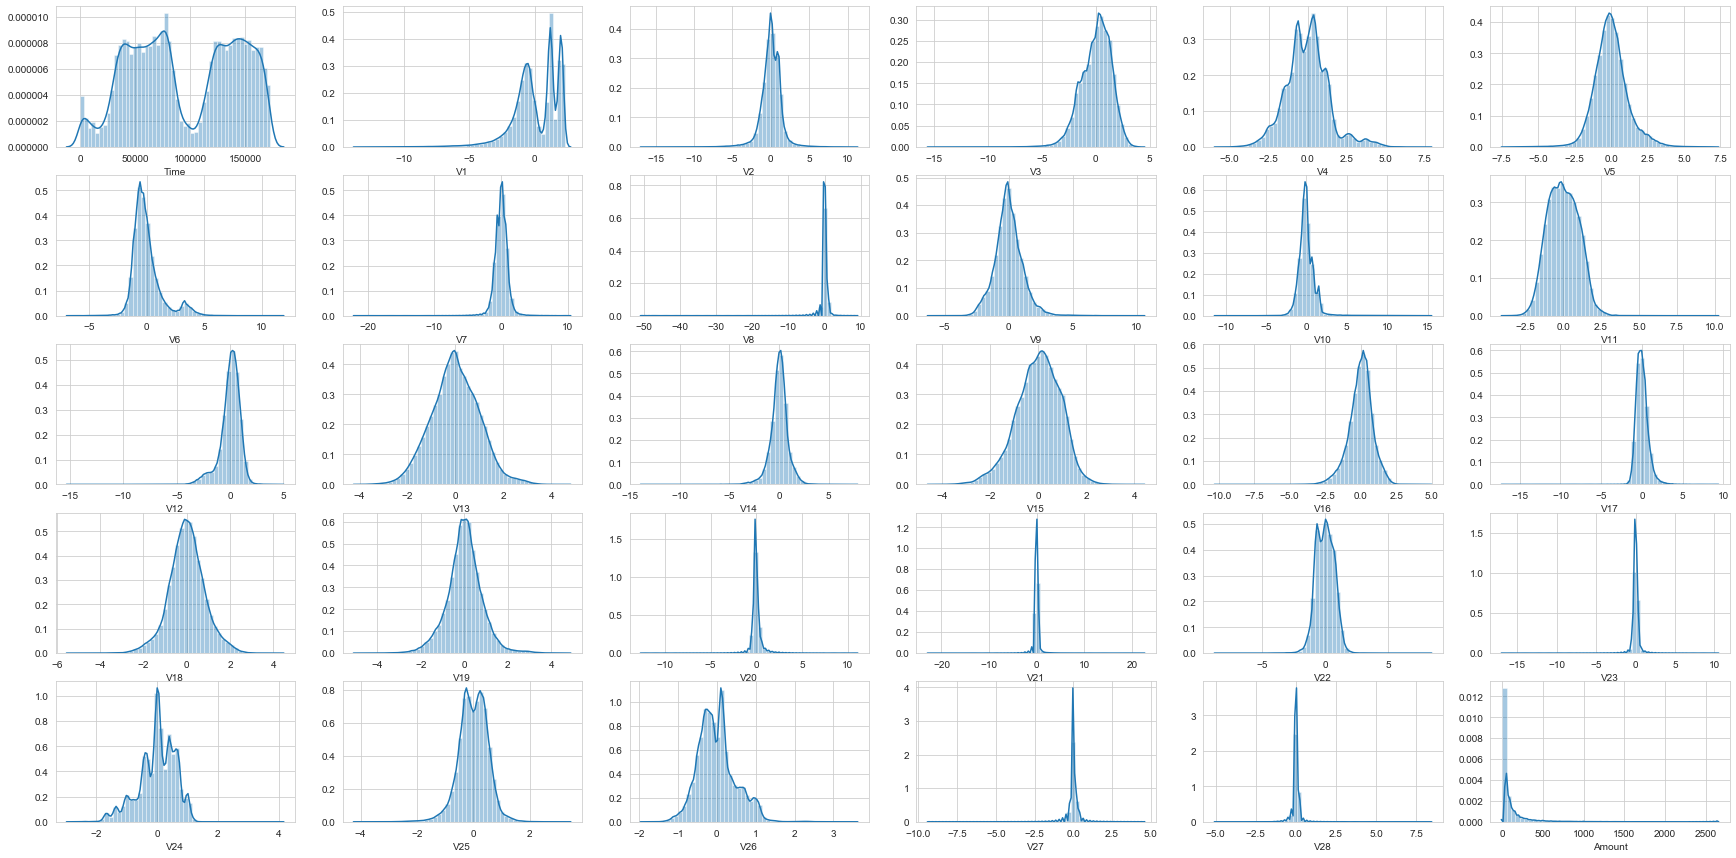

In [ ]:
#Plot distribution of each attribute of Class 0 data after removing outliers
plt.figure(figsize=(30,15))
for col in range(30):
    plt.subplot(5,6,col+1) 
    sns.distplot(data_without_outliers[data_without_outliers.Class == 0].iloc[:,col])

Number of Valid cases : 280969
Number of Fraud cases     : 492


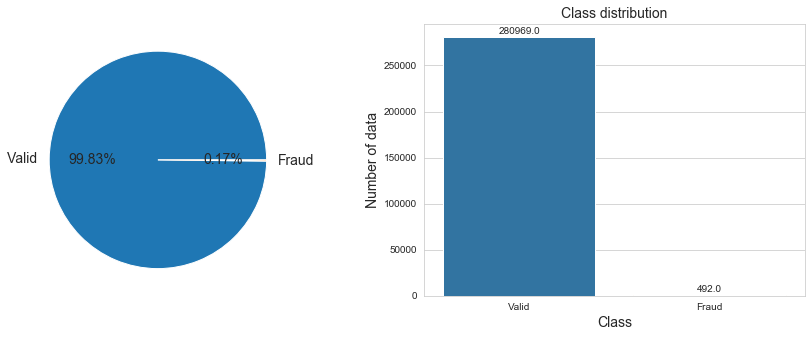

In [ ]:
# check class distribution - imbalanced
valid, fraud = data_without_outliers['Class'].value_counts()
print('Number of Valid cases :', valid)
print('Number of Fraud cases     :', fraud)
values = [valid, fraud]
labels = ['Valid', 'Fraud']
fig, axes = plt.subplots(1,2, figsize = (15,5))
axes[0].pie(values, labels = labels, autopct = '%.2f%%',textprops={'fontsize': 14})
barp = sns.barplot(x = labels , y = values, ax = axes[1])
plt.xlabel('Class',fontsize=14)
plt.ylabel('Number of data',fontsize=14)
plt.title('Class distribution',fontsize=14)
for x in barp.patches:
    barp.annotate(format(x.get_height()),(x.get_x() + x.get_width()/2 , x.get_height()) , ha = 'center', va = 'center', xytext = (0,6), textcoords = 'offset points')

plt.show()

In [ ]:
#4.Feature Selection
valid_data = data_without_outliers.loc[data_without_outliers['Class'] == 0]
fraud_data = data_without_outliers.loc[data_without_outliers['Class'] == 1]

<Figure size 432x288 with 0 Axes>

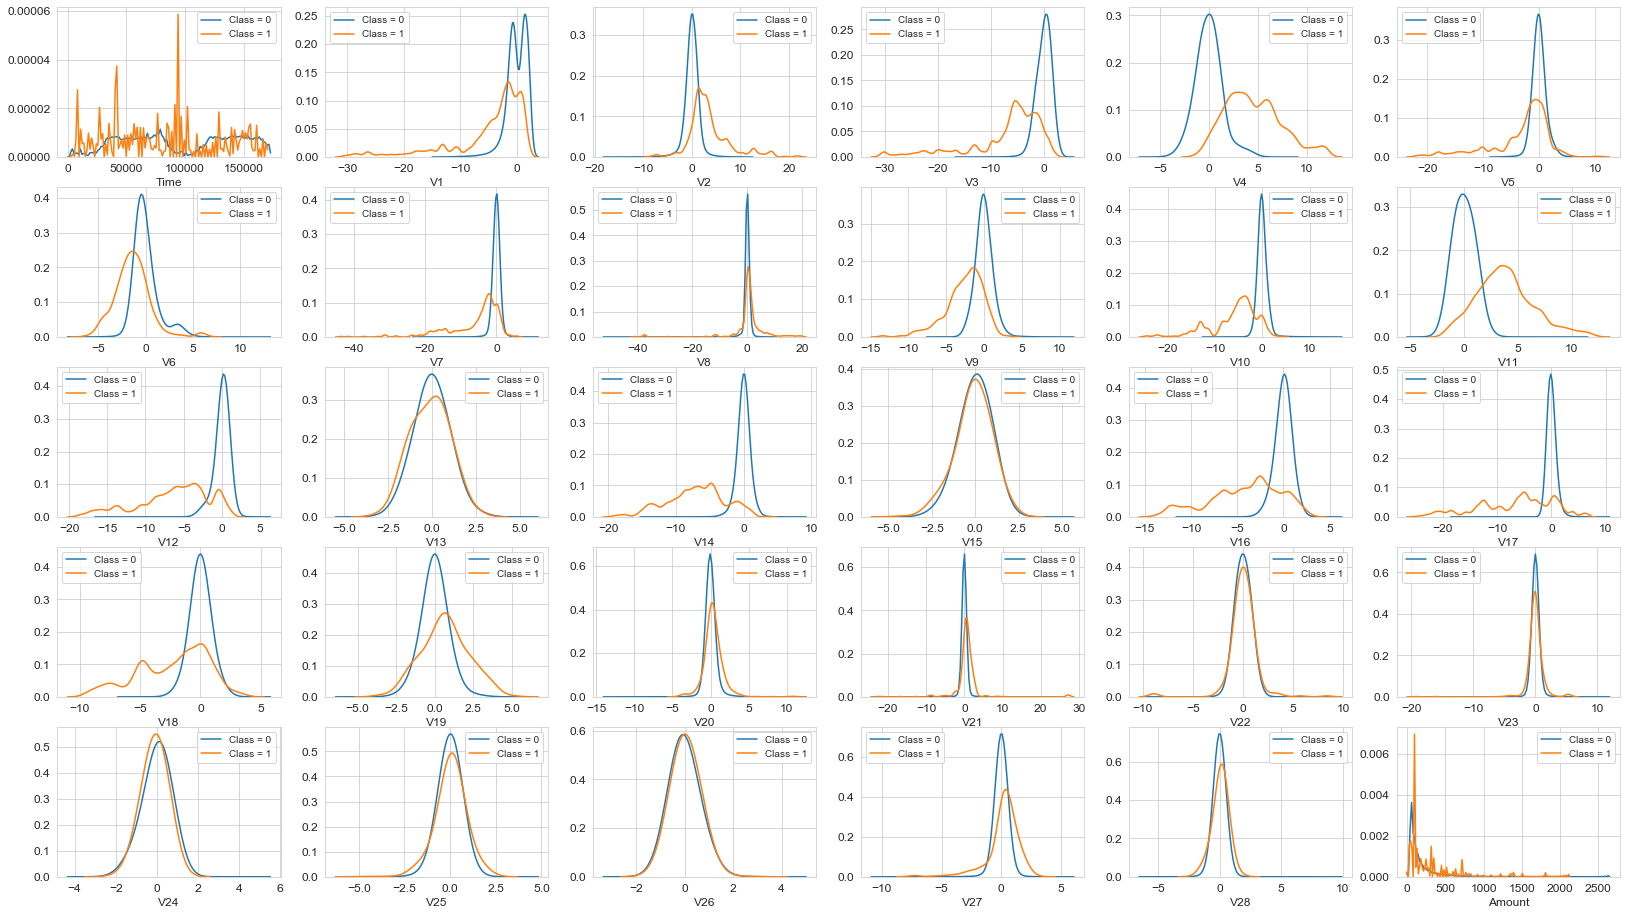

In [ ]:
#plot feature density 
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,6,figsize=(28,16))
variables = data_without_outliers.columns.values
i = 0
for attr in variables[:-1]:
    i += 1
    plt.subplot(5,6,i)
    sns.kdeplot(valid_data[attr], bw=0.5,label="Class = 0")
    sns.kdeplot(fraud_data[attr], bw=0.5,label="Class = 1")
    plt.xlabel(attr, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

Text(0.5, 1.0, 'Correlation With Class')

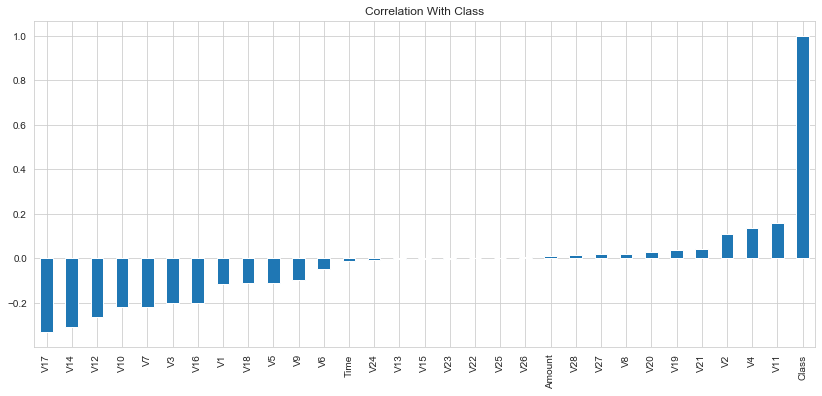

In [ ]:
# Plot correlation with class
plt.figure(figsize = (14,6))
data_without_outliers.corr()['Class'].sort_values().plot(kind = 'bar')
plt.title('Correlation With Class')

In [ ]:
#Remove feature: Time,V8,V13,V15,V20,V21,V22,V23,V25,V26,V28
data_remove_features = data_without_outliers.drop(['Time','V8','V13','V15','V20','V21','V22','V23','V25','V26','V28'],axis=1)

In [ ]:
data_remove_features.describe()
data_remove_features.shape

(281461, 20)

In [ ]:
## 5. Split the dataset into training and testing with 80:20 split ratio
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(data_remove_features, test_size=0.2, random_state=0)

In [ ]:
print('train_data.shape: ', train_data.shape)
print('test_data.shape:  ', test_data.shape)


train_data.shape:  (225168, 20)
test_data.shape:   (56293, 20)


In [ ]:
train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V24,V27,Amount,Class
126295,-1.401328,0.052193,1.289552,-0.815418,1.128455,-0.535665,0.947274,-0.921369,-0.803838,1.001489,0.154934,0.739773,0.343336,-0.616720,-0.503370,-0.653641,-0.361390,-0.104872,94.90,0
135494,0.999910,-1.169759,0.433757,-1.249706,-1.155878,0.008001,-0.647247,2.490073,-1.406624,-1.162060,0.097456,-0.100117,-0.971422,0.480445,-0.352792,0.991455,-0.461646,0.038990,133.68,0
162764,-0.718824,0.160423,2.402772,-0.390392,-0.416002,0.889289,-0.400506,1.180493,-0.966566,-1.802647,0.158437,-1.150348,0.284492,-0.466250,0.384927,-0.155532,0.641560,0.019700,23.65,0
203236,2.028341,-0.123144,-1.153051,0.461837,-0.100156,-1.110369,0.214556,0.593020,0.046270,-0.793498,0.422935,0.269747,-0.315607,-0.125108,-0.970766,0.130880,-0.000163,-0.073007,15.62,0
123049,1.114783,-0.214018,0.718692,0.814836,-0.823252,-0.426012,-0.285339,0.791931,-0.225343,-0.433872,-0.279486,0.291137,-0.479752,0.512526,-1.078731,-0.222501,0.374285,-0.022631,29.95,0


In [ ]:
test_data.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V24,V27,Amount,Class
98467,-1.531551,1.321438,-0.741287,-1.165106,1.909055,3.288151,-0.329249,-1.023441,-0.691871,-0.518091,-0.065357,0.947140,0.561164,-0.462905,0.365443,0.381816,1.039149,-0.122652,33.67,0
121698,-0.368523,-0.249912,1.677966,-1.942059,-1.929260,-0.348055,-0.276443,-1.915552,1.257205,-0.653250,-1.221059,-0.799280,-0.226939,0.343076,0.519629,-0.326690,0.399953,-0.260098,99.00,0
44321,-1.062488,0.649612,1.736630,-1.873596,-0.960234,-0.860738,-0.215749,-1.657257,-0.006823,1.213504,-0.375563,0.345118,1.672125,0.037446,-0.932546,0.299057,0.485493,0.138145,2.39,0
201882,-1.699298,-0.031715,-0.487571,-0.648471,1.103855,-0.207486,1.020651,-0.189586,-1.538537,0.654879,0.773011,-1.390766,0.402557,0.583971,0.804999,0.483000,0.212884,-0.173282,169.33,0
57720,1.255945,0.357641,0.307025,0.693178,-0.367389,-1.072064,0.090583,0.024534,-0.284297,-0.057014,0.262883,-0.297866,0.476044,-0.008188,-0.305633,-0.198893,0.346813,-0.022767,1.98,0


In [ ]:
## save the data to .csv
train_data.to_csv('dataset/training.csv',index=False)
test_data.to_csv('dataset/testing.csv',index=False)

In [ ]:
## 6. Data Oversampling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
#### oversampling on training data
# use random state 0 to ensure the same sampling result
over = SMOTE(sampling_strategy=0.2,random_state=0)

In [ ]:
steps = [('o',over)]
pipeline = Pipeline(steps=steps)

In [ ]:
train_x = train_data.iloc[:,:-1]
train_y = train_data.iloc[:,-1]

In [ ]:
train_x_resample,train_y_resample = pipeline.fit_resample(train_x,train_y)

Number of Valid cases : 224770
Number of Fraud cases     : 44954


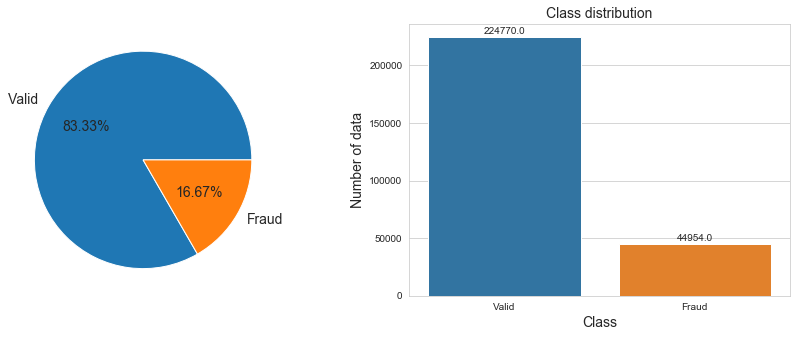

In [ ]:
# check class distribution - imbalanced
valid, fraud = train_y_resample.value_counts()
print('Number of Valid cases :', valid)
print('Number of Fraud cases     :', fraud)
values = [valid, fraud]
labels = ['Valid', 'Fraud']
fig, axes = plt.subplots(1,2, figsize = (15,5))
axes[0].pie(values, labels = labels, autopct = '%.2f%%',textprops={'fontsize': 14})
barp = sns.barplot(x = labels , y = values, ax = axes[1])
plt.xlabel('Class',fontsize=14)
plt.ylabel('Number of data',fontsize=14)
plt.title('Class distribution',fontsize=14)
for x in barp.patches:
    barp.annotate(format(x.get_height()),(x.get_x() + x.get_width()/2 , x.get_height()) , ha = 'center', va = 'center', xytext = (0,6), textcoords = 'offset points')

plt.show()

In [ ]:
# save resampled training data into file
train_data_resample = train_x_resample
train_data_resample['Class'] = train_y_resample

In [ ]:
train_data_resample.to_csv('dataset/training_resample.csv',index=False)